# Setup

In [1]:
import requests

!pip install musicbrainzngs




In [2]:
import musicbrainzngs

In [3]:
auth = musicbrainzngs.auth('username','password')

In [4]:
(musicbrainzngs.set_useragent('app','Client_ID', 
                              contact="email"))

# Get Results for Artist ID Search

In [5]:
artist_id = "c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6"


result = musicbrainzngs.get_artist_by_id(artist_id)

In [6]:
result

{'artist': {'id': 'c5c2ea1c-4bde-4f4d-bd0b-47b200bf99d6',
  'type': 'Group',
  'name': 'The xx',
  'sort-name': 'xx, The',
  'disambiguation': 'London UK three-piece',
  'country': 'GB',
  'area': {'id': '8a754a16-0027-3a29-b6d7-2b40ea0481ed',
   'name': 'United Kingdom',
   'sort-name': 'United Kingdom',
   'iso-3166-1-code-list': ['GB']},
  'begin-area': {'id': '54181a4b-9f77-4919-b8c5-f7af03fbbe17',
   'name': 'Wandsworth',
   'sort-name': 'Wandsworth',
   'iso-3166-2-code-list': ['GB-WND']},
  'life-span': {'begin': '2005'}}}

In [7]:
result = musicbrainzngs.get_artist_by_id(artist_id,
              includes=["release-groups"], release_type=["album", "ep"])


for release_group in result["artist"]["release-group-list"]:
    print("{title} ({type})".format(title=release_group["title"],
                                    type=release_group["type"]))

xx (Album)
Coexist (Album)
I See You (Album)
Remixes (Compilation)
FACT Mix 70: The xx (Compilation)
Islands (EP)
Tour 7" (EP)
Hivern Remixes (EP)
KEXP Session (EP)
iTunes Live From SoHo (EP)
iTunes Festival: London 2010 (EP)
Innervisions Remixes (EP)


In [32]:
import pandas as pd
df = pd.DataFrame(result['artist']['release-group-list'])
df['first-release-date'] = pd.to_datetime(df["first-release-date"])  

df['year'] = pd.DatetimeIndex(df['first-release-date']).year
df['month'] = pd.DatetimeIndex(df['first-release-date']).month
df['day'] = pd.DatetimeIndex(df['first-release-date']).day

In [33]:
df

,id,type,title,first-release-date,primary-type,secondary-type-list,year,month,day
0,23355caf-a543-4b5f-80fe-449101868fc1,Album,xx,2009-08-14,Album,NaN,2009,8,14
1,a862b364-6b65-4b6f-945f-6f4f1258411a,Album,Coexist,2012-09-05,Album,NaN,2012,9,5
2,8f7e23d4-8b15-491f-b006-4a9ff5a41229,Album,I See You,2017-01-13,Album,NaN,2017,1,13
3,906bc6f7-caa9-43f0-a47b-9071c2717bd4,Compilation,Remixes,2018-01-19,Album,[Compilation],2018,1,19
4,367c8244-5eb6-40a5-967f-c709303dd38d,Compilation,FACT Mix 70: The xx,2009-07-31,Album,"[Compilation, DJ-mix]",2009,7,31
5,69580ac3-8b91-4aed-a6e0-1404add6f85f,EP,Islands,2009-10-26,EP,NaN,2009,10,26
6,d23eeff0-3f27-4d62-bbb8-5896537d06c8,EP,"Tour 7""",2010-01-01,EP,NaN,2010,1,1
7,edb5803e-f084-411f-a3e9-c9fd58aad280,EP,Hivern Remixes,2013-11-11,EP,NaN,2013,11,11
8,c5624cb4-ce3b-4d16-a3d1-a5f5ecb07e1d,EP,KEXP Session,2009-01-01,EP,[Live],2009,1,1
9,181fb40d-1473-496c-a730-6bf8728427cd,EP,iTunes Live From SoHo,2010-03-09,EP,[Live],2010,3,9


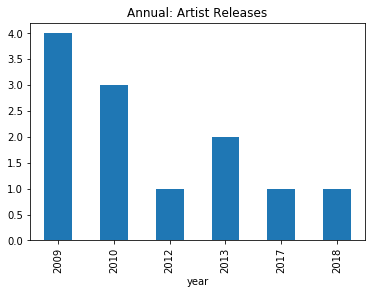

In [49]:
_ = df.groupby('year')['id'].count().plot(kind='bar',title='Annual: Artist Releases')

# Get Album Cover Art

In [9]:
release_id = "7e643344-946e-4118-b934-6574695e68bf"
data = musicbrainzngs.get_release_group_image_list(release_id)


for image in data["images"]:
    if "Front" in image["types"] and image["approved"]:
        print("%s is an approved front image!" % image["thumbnails"]["large"])
        break

http://coverartarchive.org/release/54216929-a273-4e78-a10d-695ef3ab0c82/5199098961-500.jpg is an approved front image!
